In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import sciunit
import sciunit.scores
import neuronunit
from neuronunit.models.reduced import ReducedModel
from neuronunit.capabilities import ProducesSpikes

/home/rgerkin/miniconda3/lib/python3.6/site-packages/pyNN/neuron/__init__.py:14: UserWarning: mpi4py not available
  warnings.warn("mpi4py not available")


In [2]:
# Assumes imported neuronunit is from source, e.g. pip install -e
path = os.path.join(neuronunit.__path__[0],'models/NeuroML2/LEMS_2007One.xml')
# Instantiate three identical models
models = [ReducedModel(path, name='Izhikevich', backend='jNeuroML') for i in range(2)]

In [3]:
# Change the parameters of the second model
models[1].set_attrs({'izhikevich2007Cell':{'a':'0.04 per_ms'}})
models[1].name = 'Izhikevich_new'

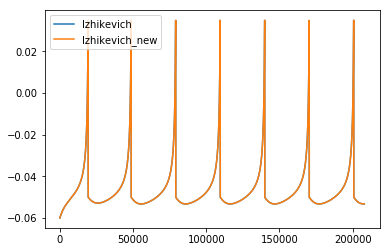

In [4]:
for model in models:
    plt.plot(model.get_membrane_potential(),label=model)
plt.legend();

In [5]:
# A new M2M test which will compare the equality of spike counts across models
class MyTest(sciunit.Test):
    required_capabilities = (ProducesSpikes,)
    score_type = sciunit.scores.ZScore
    def generate_prediction(self,model):
        count = model.get_spike_count()
        return count

In [6]:
test = MyTest(observation={'mean':8, 'std':3})

In [7]:
s = test.judge(models)

/home/rgerkin/Dropbox (ASU)/dev/scidash/sciunit/sciunit/__init__.py:1135: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.tests = tests
/home/rgerkin/Dropbox (ASU)/dev/scidash/sciunit/sciunit/__init__.py:1136: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.models = models
/home/rgerkin/Dropbox (ASU)/dev/scidash/sciunit/sciunit/__init__.py:1138: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.weights = np.ones(n) if weights is None else np.array(weights)


In [8]:
# The score matrix
s

,MyTest
Izhikevich,Z = -0.33
Izhikevich_new,Z = -0.33


In [9]:
test.json()

{'description': None,
 'name': 'MyTest',
 'observation': {'mean': 8, 'std': 3},
 'unpicklable': [],
 'verbose': 1}

In [10]:
def check_url(x):
    if not x.json().get('url'):
        print("Model has no associated url; please set the url attribute of the model")
check_url(models[0])

Model has no associated url; please set the url attribute of the model


In [11]:
# How do you want your GitHub URLs?  
lems_url = ("https://github.com/scidash/neuronunit/blob/master/neuronunit/"
            "models/NeuroML2/LEMS_2007One.xml")
models[0].url = lems_url
models[1].url = lems_url

In [12]:
check_url(models[0])

In [13]:
# Has fewer attributes because most of them came from the LEMS file so those are assumed
# to still be the values in memory.  If we need to extract these then I need to find a
# way to read them from the file; however, there may be no general way to do so for all
# LEMS files, and certainly not for all possible models.  
models[0].json()

{'attrs': {},
 'name': 'Izhikevich',
 'run_params': {},
 'url': 'https://github.com/scidash/neuronunit/blob/master/neuronunit/models/NeuroML2/LEMS_2007One.xml'}

In [14]:
# Has more attributes because some of the original attributes from the LEMS file 
# were replaced with new ones in this session
models[1].json()

{'attrs': {'izhikevich2007Cell': {'a': '0.04 per_ms'}},
 'name': 'Izhikevich_new',
 'run_params': {},
 'url': 'https://github.com/scidash/neuronunit/blob/master/neuronunit/models/NeuroML2/LEMS_2007One.xml'}

In [15]:
score = s['Izhikevich','MyTest']
score.json()

{'model': {'attrs': {},
  'name': 'Izhikevich',
  'run_params': {},
  'url': 'https://github.com/scidash/neuronunit/blob/master/neuronunit/models/NeuroML2/LEMS_2007One.xml'},
 'observation': {'mean': 8, 'std': 3},
 'prediction': 7,
 'related_data': {},
 'score': -0.3333333333333333,
 'test': {'description': None,
  'name': 'MyTest',
  'observation': {'mean': 8, 'std': 3},
  'unpicklable': [],
  'verbose': 1},
 'unpicklable': []}

In [16]:
score.json(add_props=True)

{'_class': 'ZScore',
 'model': {'_class': 'ReducedModel',
  'attrs': {},
  'capabilities': ['Runnable',
   'ReceivesCurrent',
   'ReceivesSquareCurrent',
   'ProducesActionPotentials',
   'ProducesSpikes',
   'ProducesMembranePotential'],
  'name': 'Izhikevich',
  'run_params': {},
  'url': 'https://github.com/scidash/neuronunit/blob/master/neuronunit/models/NeuroML2/LEMS_2007One.xml'},
 'observation': {'mean': 8, 'std': 3},
 'prediction': 7,
 'raw': '-0.3333',
 'related_data': {},
 'score': -0.3333333333333333,
 'sort_key': 0.7388826803635273,
 'summary': "=== Model Izhikevich achieved score Z = -0.33 on test 'MyTest'. ===",
 'test': {'_class': 'MyTest',
  'description': None,
  'name': 'MyTest',
  'observation': {'mean': 8, 'std': 3},
  'unpicklable': [],
  'verbose': 1},
 'unpicklable': []}